**[MDR-01]** 필요한 모듈을 임포트한다.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

**[MDR-02]** MNIST 데이터 세트를 준비한다.

In [3]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**[MDR-03]** 필터에 해당하는 Variable을 준비하고 입력 데이터에 필터와 풀링 계층을 적용하는 계산식을 정의한다.

In [4]:
num_filters = 16

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,num_filters], stddev=0.1))
h_conv = tf.nn.conv2d(x_image, W_conv,
                      strides=[1,1,1,1], padding='SAME')
h_pool =tf.nn.max_pool(h_conv, ksize=[1,2,2,1],
                       strides=[1,2,2,1], padding='SAME')

**[MDR-04]** 풀링 계층의 출력을 전 결합층을 경유해서 소프트맥스 함수로 입력하는 계산식을 정의한다.

In [5]:
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*num_filters])

num_units1 = 14*14*num_filters
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

**[MDR-05]** 오차 함수 loss, 트레이닝 알고리즘 train_step, 정답률 accuracy를 정의한다.

In [6]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MDR-06]** 세션을 준비하고 Variable을 초기화한 후, 최적화 처리를 마친 세션을 복원한다.

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, 'data\ckpt\mdc_session.ckpt-4000')

INFO:tensorflow:Restoring parameters from data\ckpt\mdc_session.ckpt-4000


**[MDR-07]** 합성곱 필터의 값과 최초 9개의 이미지 데이터에 대해 합성곱 필터와 풀링 계층을 적용한 결과를 얻는다.

In [8]:
filter_vals, conv_vals, pool_vals = sess.run(
    [W_conv, h_conv, h_pool], feed_dict={x:mnist.test.images[:9]})

**[MDR-08]** 합성곱 필터를 적용한 결과를 이미지로 출력한다.

합성곱 필터를 적용한 후에는 픽셀값이 음의 값을 갖는 경우도 있으므로 배경(픽셀값 0) 부분이 흰색이 되지 않는다는 점에 주의하기 바란다.

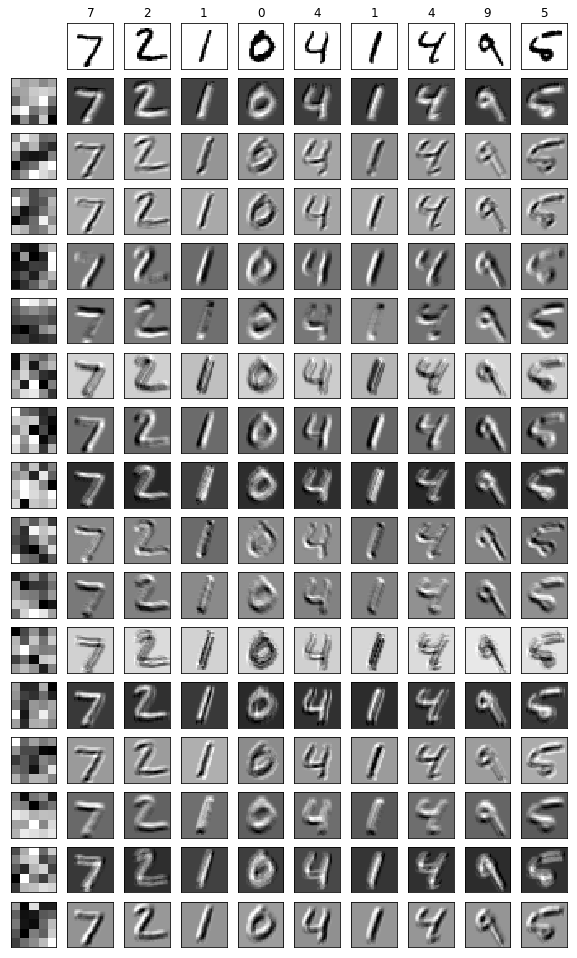

In [9]:
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')    

**[MDR-09]** 마찬가지로 합성곱 필터와 풀링 계층을 적용한 결과를 이미지로 출력한다.

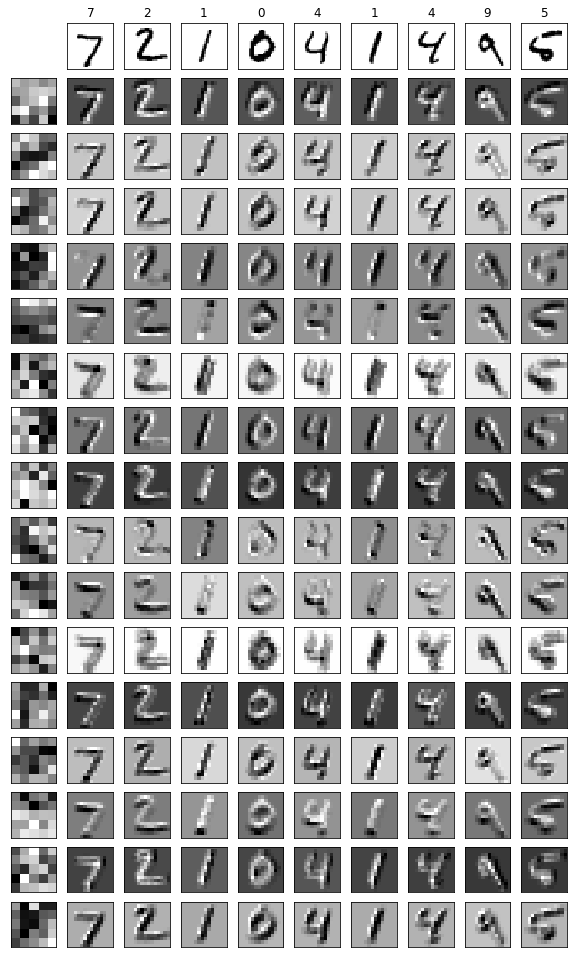

In [10]:
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest') 

**[MDR-10]** 올바르게 분류할 수 없었던 몇몇 데이터에 대해 각각의 문자일 확률을 확인한다.

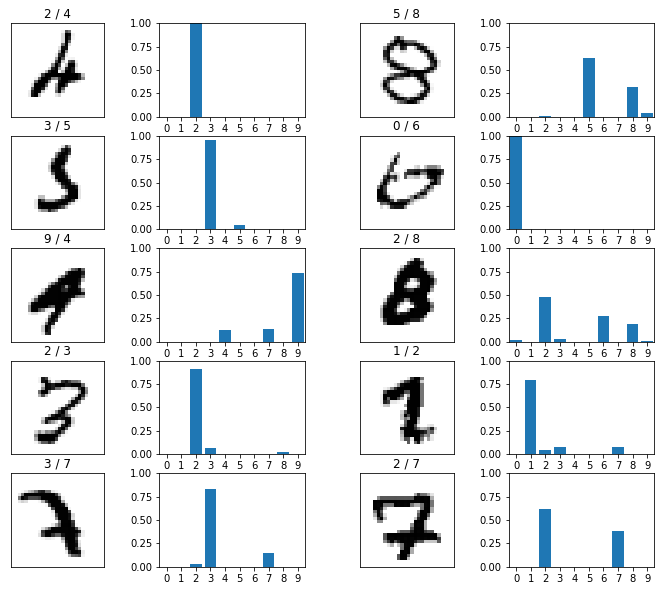

In [11]:
fig = plt.figure(figsize=(12,10))
c=0
for (image, label) in zip(mnist.test.images, 
                          mnist.test.labels):
    p_val = sess.run(p, feed_dict={x:[image]})
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5,4,c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")
    subplot = fig.add_subplot(5,4,c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10), pred, align='center')
    c += 1
    if c == 10:
        break